In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [3]:
housing = pd.read_excel('clean_housing.xlsx')
education = pd.read_excel('clean_education.xlsx')

In [4]:
housing_percent = housing.groupby("county_fips")["percent"].mean()
#housing_percent

In [5]:
education_estimate = education.groupby("county_fips")["estimate"].mean()
#education_estimate

In [16]:
estimation = pd.concat([housing_percent, education_estimate], axis=1).rename(columns={"percent": "housing_percent", "estimate": "education_estimate"})
#estimation

We'll check for assumptions:

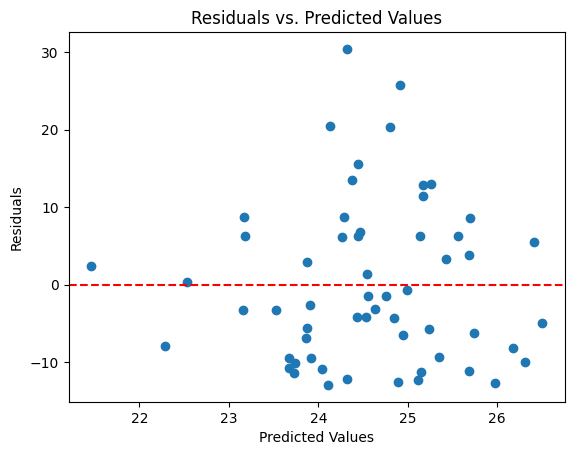

In [21]:
# Homoscedasticity
X = sm.add_constant(estimation[['education_estimate', 'housing_percent']])
residuals = model.resid
predicted = model.predict(X)

plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Assumption is met

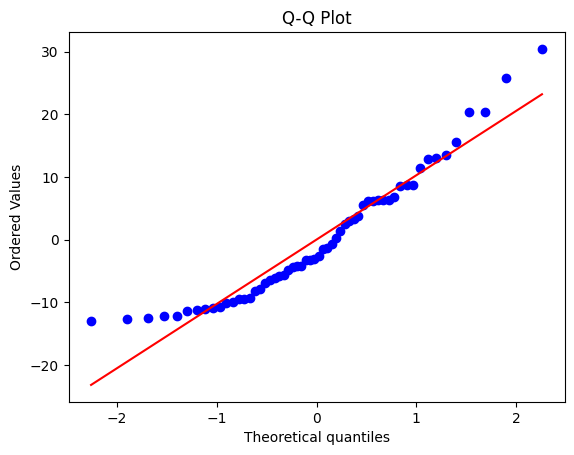

In [22]:
# Normality
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Assumption is met

The assumptions for the test are met, so we can run the regression and scatterplot. 

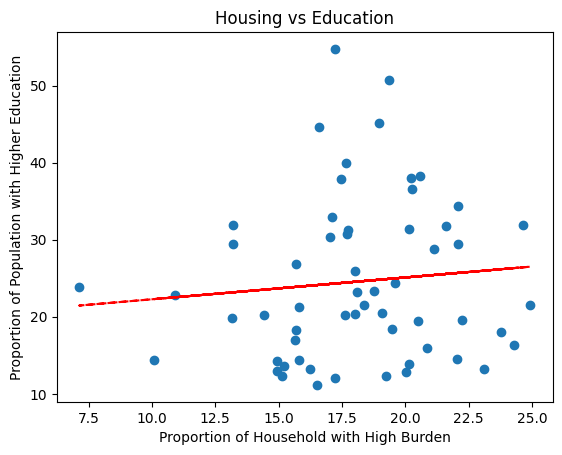

In [24]:
plt.scatter(estimation["housing_percent"], estimation["education_estimate"])
plt.xlabel("Proportion of Household with High Burden")
plt.ylabel("Proportion of Population with Higher Education")
plt.title("Housing vs Education")
z = np.polyfit(estimation["housing_percent"], estimation["education_estimate"], 1)
p = np.poly1d(z)
plt.plot(estimation["housing_percent"],p(estimation["housing_percent"]),"r--")

In [25]:
model = smf.ols('education_estimate ~ housing_percent', data=estimation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     education_estimate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5255
Date:                Sun, 10 Mar 2024   Prob (F-statistic):              0.472
Time:                        11:08:06   Log-Likelihood:                -217.64
No. Observations:                  58   AIC:                             439.3
Df Residuals:                      56   BIC:                             443.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.4354      7.200     